In [29]:
%matplotlib notebook
from sklearn import linear_model, svm,model_selection
import sklearn
from arftools import *
import numpy as np
import matplotlib.pyplot as plt
from tme4_etu import load_usps

trainx,trainy = load_usps("USPS/USPS_train.txt")
testx,testy = load_usps("USPS/USPS_test.txt")

sklearn

<module 'sklearn' from '/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/__init__.py'>

In [5]:
perceptron = linear_model.Perceptron()
perceptron.fit(trainx,trainy)
perceptron.score(testx,testy)

/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.88739412057797706

### 3 SVM et Grid Search

In [6]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
# Afin de visualiser les frontieres de décisions en 2D :
def plot_frontiere_proba(data, f, step=20):
    grid, x, y = make_grid (data=data, step=step)
    plt.contourf(x, y, f(grid).reshape(x.shape), 255)

233


<IPython.core.display.Javascript object>


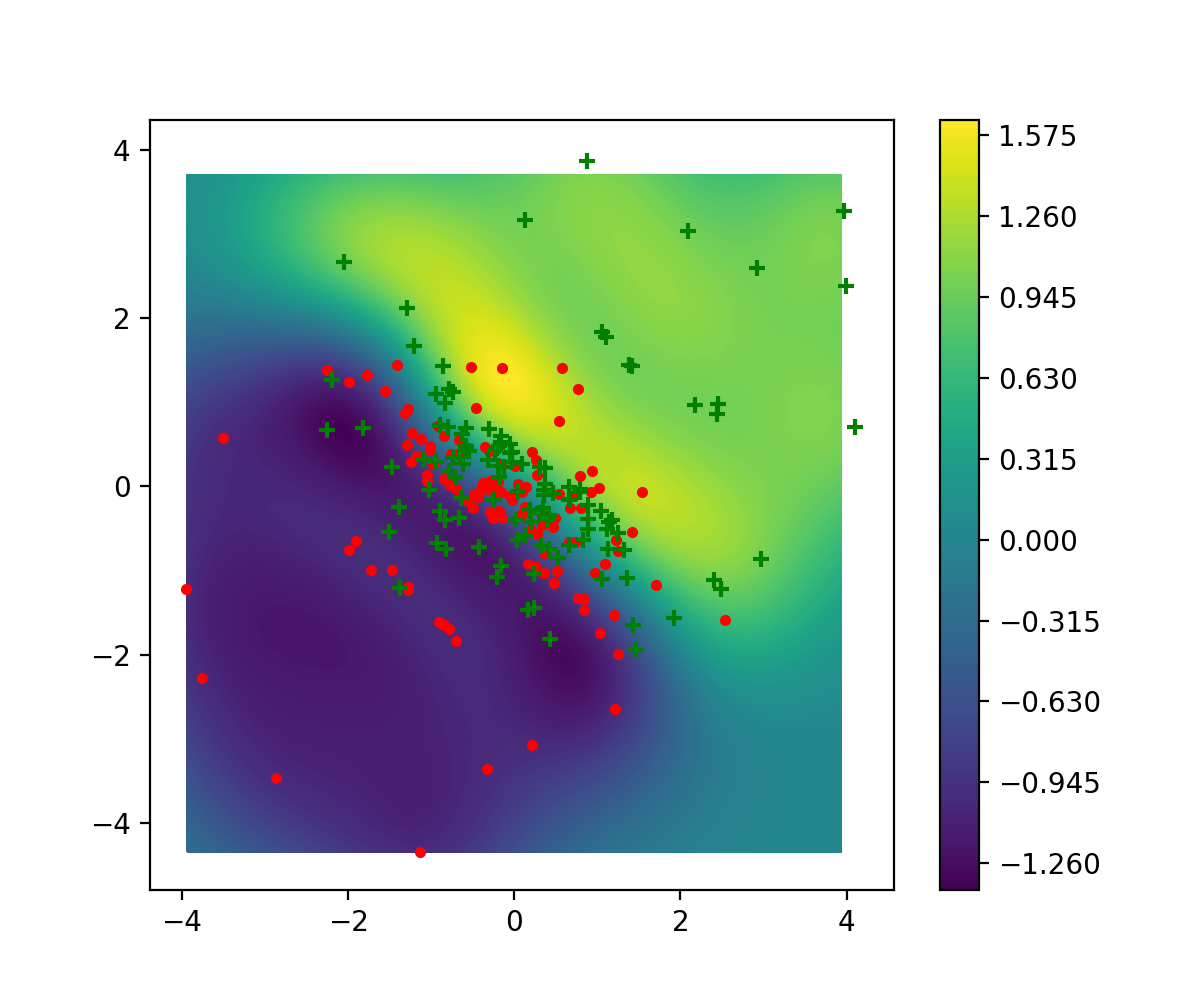

In [7]:
# Gaussien

# svmi = svm.SVC(probability = True, degree=2) #, ...)d
# svmi.fit(trainx,trainy)
# plot_frontiere_proba(trainx, lambda x: svmi.predict_proba(x)[:,0], step=50)

svmi = sklearn.svm.SVC(probability = False) #, ...)d
svmi.fit(trainx,trainy)

print(svmi.support_.size)

plt.figure(figsize=(6,5))
plot_frontiere_proba(trainx, lambda x: svmi.decision_function(x), step=50)
plt.colorbar()
plot_data(trainx[svmi.support_], trainy[svmi.support_])
# plt.scatter(support_vec[:,0], support_vec[:,1])
plt.show()

213


<IPython.core.display.Javascript object>


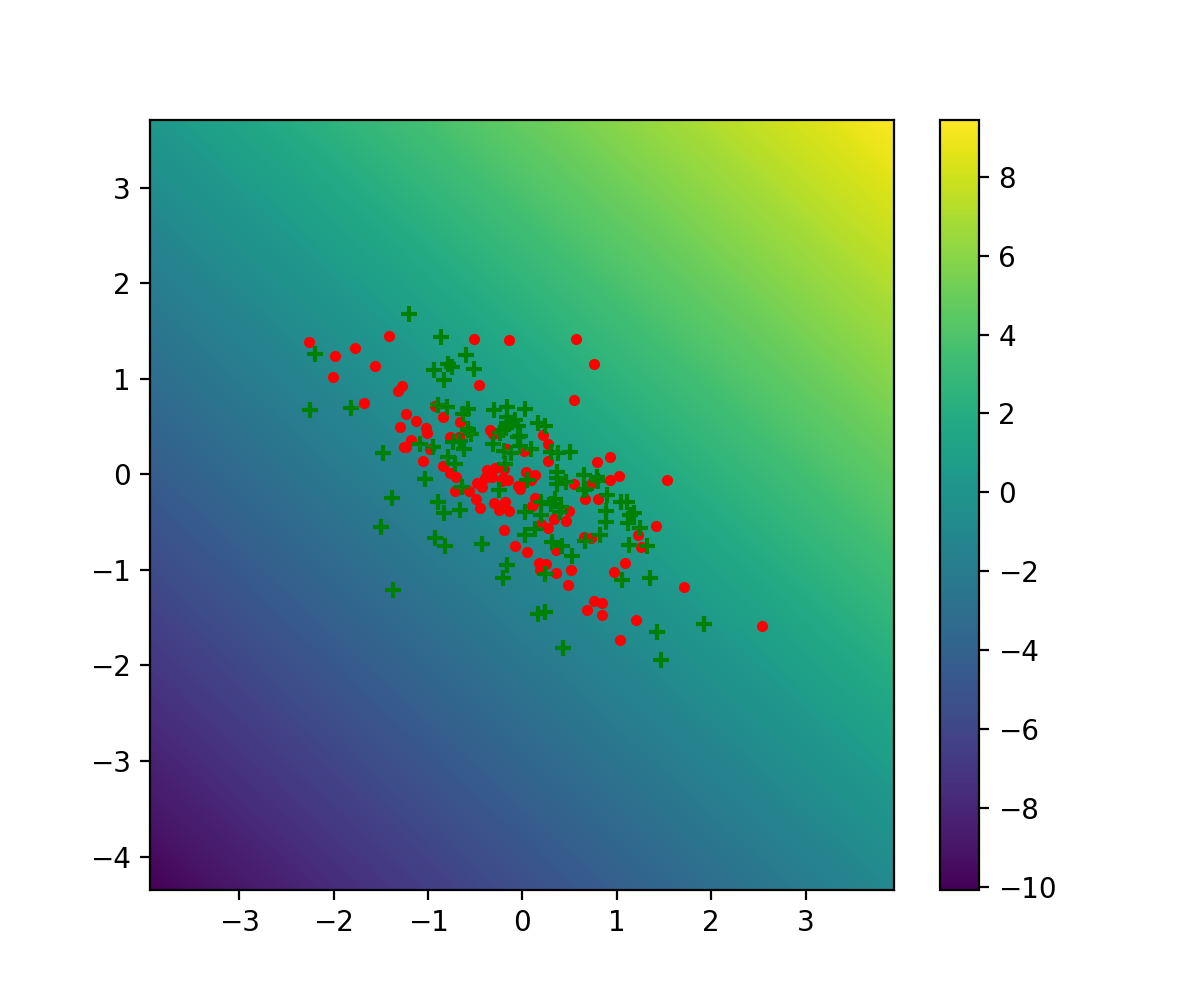

In [8]:
# Lienaire
svmi = sklearn.svm.SVC(probability = False, kernel="linear") #, ...)d
svmi.fit(trainx,trainy)

print(svmi.support_.size)

plt.figure(figsize=(6,5))
plot_frontiere_proba(trainx, lambda x: svmi.decision_function(x), step=50)
plt.colorbar()
plot_data(trainx[svmi.support_], trainy[svmi.support_])
plt.show()

Number of support points 974


<IPython.core.display.Javascript object>


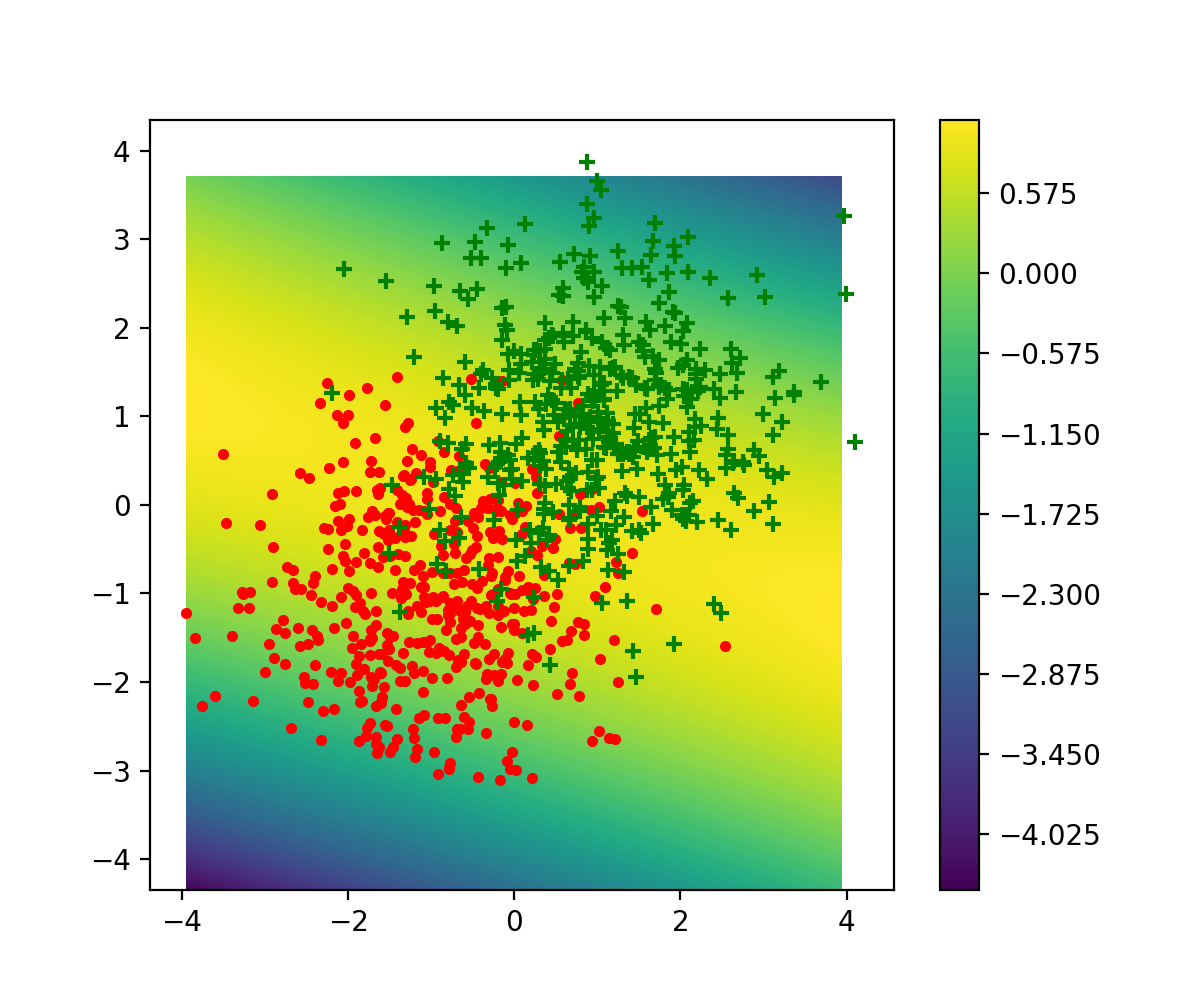

In [11]:
# Polynomial
svmi = sklearn.svm.SVC(probability = False, kernel="poly", degree=2) #, ...)d
svmi.fit(trainx,trainy)

print("Number of support points "+str(svmi.support_.size))

plt.figure(figsize=(6,5))
plot_frontiere_proba(trainx, lambda x: svmi.decision_function(x), step=50)
plt.colorbar()
plot_data(trainx[svmi.support_], trainy[svmi.support_])
plt.show()

<IPython.core.display.Javascript object>


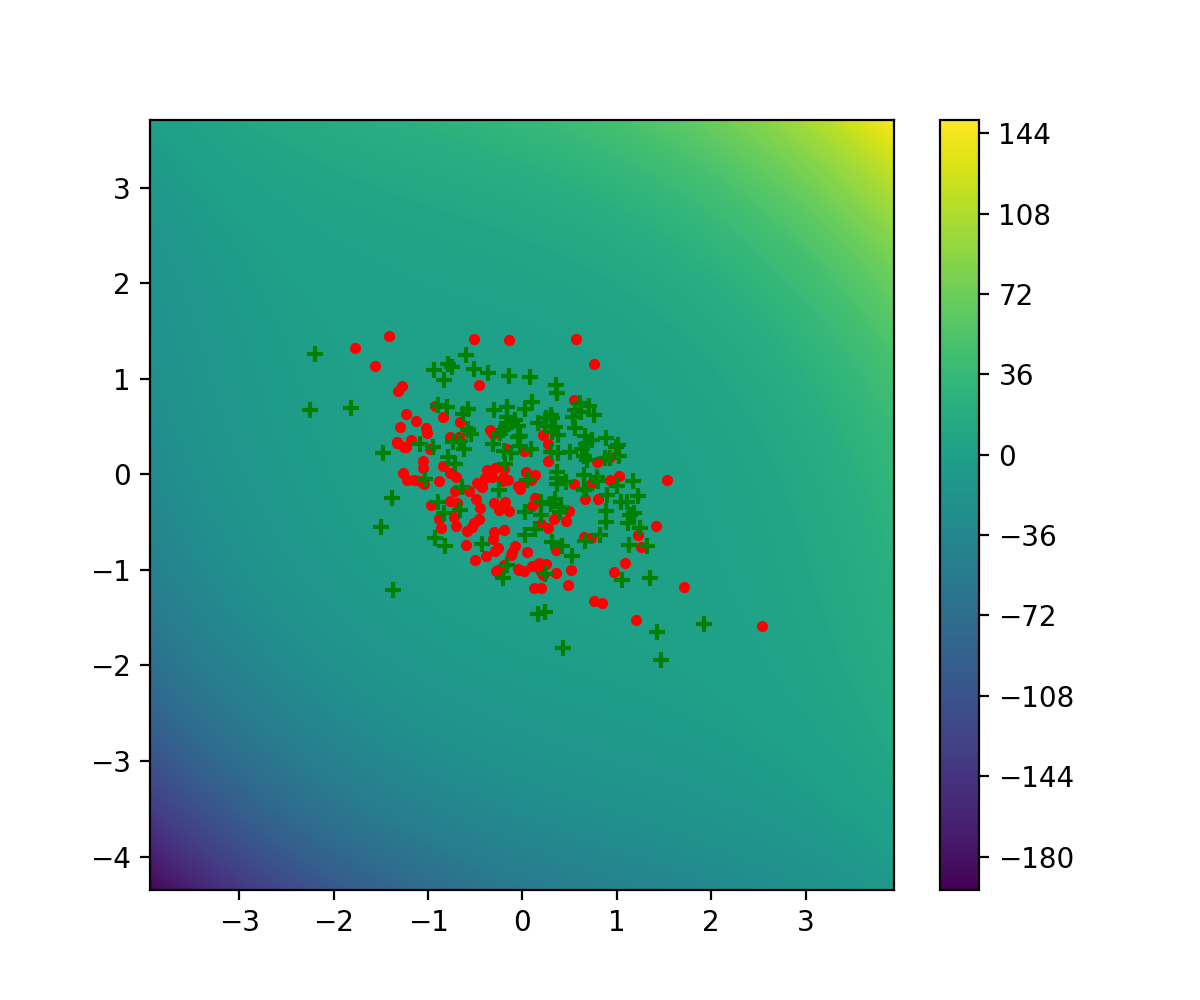

In [12]:
# Polynomial
svmi = sklearn.svm.SVC(probability = False, kernel="poly", degree=3) #, ...)d
svmi.fit(trainx,trainy)

plt.figure(figsize=(6,5))
plot_frontiere_proba(trainx, lambda x: svmi.decision_function(x), step=50)
plt.colorbar()
plot_data(trainx[svmi.support_], trainy[svmi.support_])
plt.show()

<IPython.core.display.Javascript object>


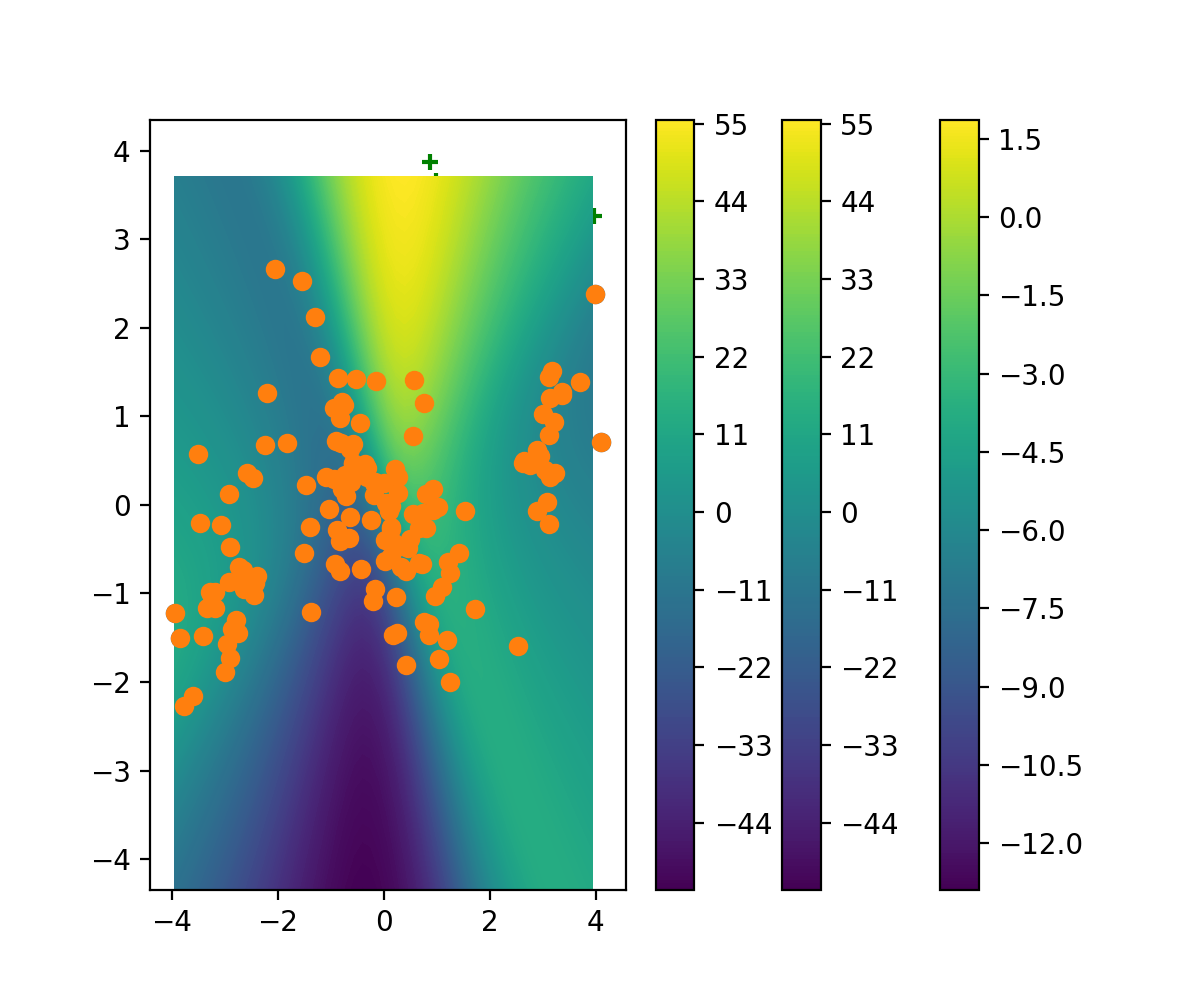

In [13]:
# Polynomial
svmi = sklearn.svm.SVC(probability = False, kernel="poly", degree=4) #, ...)d
svmi.fit(trainx,trainy)

plt.figure(figsize=(6,5))
plot_frontiere_proba(trainx, lambda x: svmi.decision_function(x), step=50)
plt.colorbar()
plot_data(trainx[svmi.support_], trainy[svmi.support_])
plt.show()

In [15]:
# Lienaire
svmi = sklearn.svm.SVC(probability = False, kernel="sigmoid") #, ...)d
svmi.fit(trainx,trainy)

support_vec = svmi.support_vectors_

plot_frontiere_proba(trainx, lambda x: svmi.decision_function(x), step=50)
plt.colorbar()
plt.scatter(support_vec[:,0], support_vec[:,1])
plt.show()

**Vous étudierer en particulier les frontières de décisions et les vecteurs supports - les points dont les coefficients sont non nuls.**

**Comment évolue le nombre de ces derniers en fonction du noyau et de son paramètrage ? **

On obitent les résultats suivants pour 1000 points aléatoires:

- poly deg2: 990
- poly deg3: 274
- poly deg4: 999
- poly deg5: 317
- poly deg6: 995
- linear: 224
- sigmoid: 148
- gaussien 242

On peut voir que pour les fonction de noyau que la frontière de décision est plus déma

**Est-ce normal ? **

Bien sur!

Que retrouvez vous dans le cas linéaire ?**

In [27]:
svmi = sklearn.svm.SVC(probability = False, kernel="poly", degree=3) 
svmi.fit(trainx,trainy)
print("poly: " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, kernel="poly", degree=2) 
svmi.fit(trainx,trainy)
print("poly deg2: " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, kernel="poly", degree=3) 
svmi.fit(trainx,trainy)
print("poly deg3: " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, kernel="poly", degree=4) 
svmi.fit(trainx,trainy)
print("poly deg4: " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, kernel="linear")
svmi.fit(trainx,trainy)
print("linear: " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, kernel="linear", C=0.2)
svmi.fit(trainx,trainy)
print("linear (C=0.2): " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, kernel="sigmoid")
svmi.fit(trainx,trainy)
print("sigmoid: " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, kernel="sigmoid", coef0=1)
svmi.fit(trainx,trainy)
print("sigmoid coef0=1: " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False)
svmi.fit(trainx,trainy)
print("gaussien " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, gamma=2)
svmi.fit(trainx,trainy)
print("gaussien gamma2 " + str(svmi.support_.size))

svmi = sklearn.svm.SVC(probability = False, gamma=3)
svmi.fit(trainx,trainy)
print("gaussien gamma3 " + str(svmi.support_.size))

poly: 278
poly deg2: 974
poly deg3: 278
poly deg4: 982
linear: 213
linear (C=0.2): 223
sigmoid: 154
sigmoid coef0=1: 194
gaussien 233
gaussien gamma2 297
gaussien gamma3 367


In [ ]:
### GridSearch

In [42]:
from utils import filter_values, one_againt_others

In [43]:
X, Y = filter_values(trainx, trainy, 0,7)

0-7
{'gamma': 0.001, 'kernel': 'rbf', 'C': 10}
0.920037455215


<IPython.core.display.Javascript object>


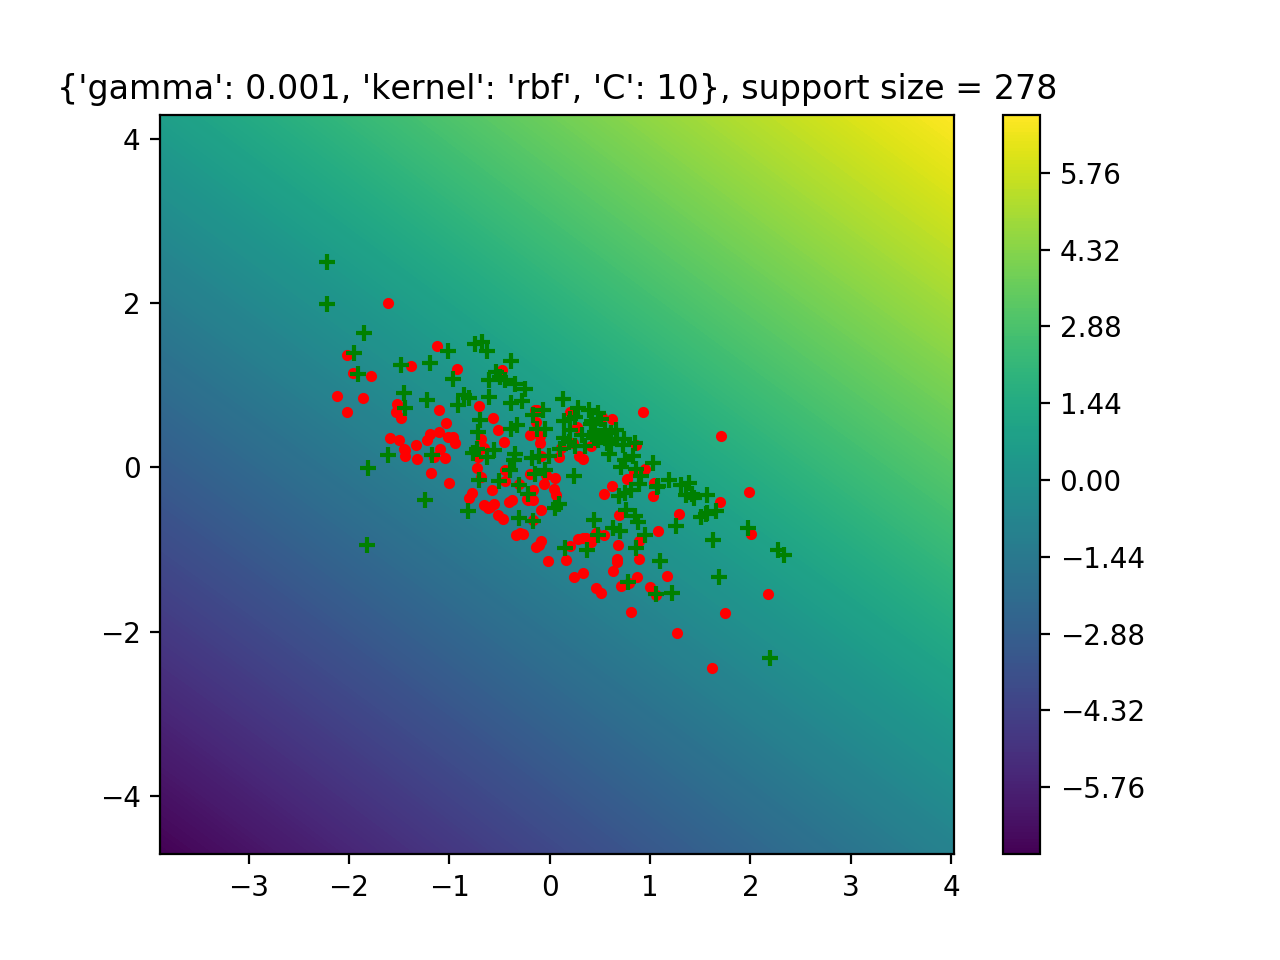

In [54]:
C = [1, 10, 100, 1000]
coef0 = [-1,0,-1]
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': C},
                    {'kernel': ['linear'], 'C': C},
                    {'kernel': ['poly'], 'C':C, 'degree':[1,2,3], 'coef0':coef0}]

#https://stackoverflow.com/questions/21390570/scikit-learn-svc-coef0-parameter-range

#for a,b in [(0,7),(1,3),(4,9)]:
X,Y =  gen_arti(nbex=1000,data_type=0,epsilon=1)
#testx,testy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
svci = sklearn.svm.SVC(probability = False)
clf = model_selection.GridSearchCV(svci, tuned_parameters, cv=5,scoring='precision')
clf.fit(X,Y)
print(str(a) + '-' + str(b))
print(clf.best_params_)
print(clf.best_score_)
svmi = clf.best_estimator_
title = str(clf.best_params_) + ", support size = " + str(svmi.support_.size)
plt.figure()
plot_frontiere_proba(X, lambda x: svmi.decision_function(x), step=50)
plt.colorbar()
plt.title(title)
plot_data(X[svmi.support_], Y[svmi.support_])
plt.savefig('../compte_rendu/TME1_6/images/tme5/grid_arti.png')

In [56]:
clf.grid_scores_

/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91972, std: 0.01686, params: {'gamma': 0.001, 'kernel': 'rbf', 'C': 1},
 mean: 0.91693, std: 0.01856, params: {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1},
 mean: 0.92004, std: 0.01685, params: {'gamma': 0.001, 'kernel': 'rbf', 'C': 10},
 mean: 0.91972, std: 0.01686, params: {'gamma': 0.0001, 'kernel': 'rbf', 'C': 10},
 mean: 0.91604, std: 0.00783, params: {'gamma': 0.001, 'kernel': 'rbf', 'C': 100},
 mean: 0.92004, std: 0.01685, params: {'gamma': 0.0001, 'kernel': 'rbf', 'C': 100},
 mean: 0.91775, std: 0.00934, params: {'gamma': 0.001, 'kernel': 'rbf', 'C': 1000},
 mean: 0.91604, std: 0.00783, params: {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1000},
 mean: 0.91792, std: 0.00923, params: {'kernel': 'linear', 'C': 1},
 mean: 0.91603, std: 0.01212, params: {'kernel': 'linear', 'C': 10},
 mean: 0.91603, std: 0.01212, params: {'kernel': 'linear', 'C': 100},
 mean: 0.91603, std: 0.01212, params: {'kernel': 'linear', 'C': 1000},
 mean: 0.91604, std: 0.00783, params: {'coef0': -1, 'degre

<IPython.core.display.Javascript object>


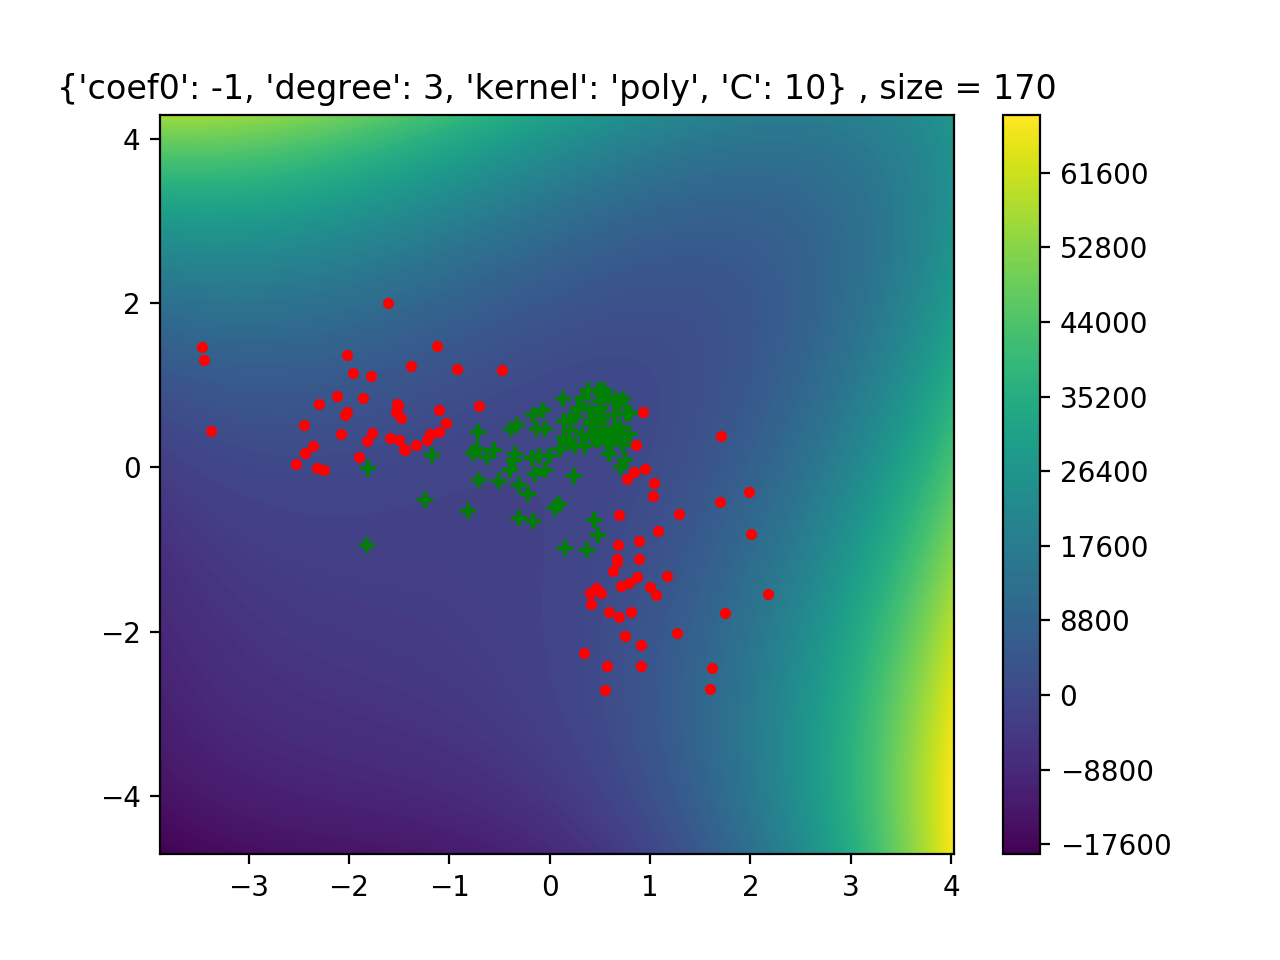

In [63]:
#mean: 0.81418, std: 0.03319, params: {'coef0': -1, 'degree': 3, 'kernel': 'poly', 'C': 10}
svmi2 = sklearn.svm.SVC(probability = False, kernel="poly", degree=3, C=10, coef0=-1) #, ...)d
svmi2.fit(X,Y)

title = "{'coef0': -1, 'degree': 3, 'kernel': 'poly', 'C': 10} , size = " + str(svmi2.support_.size)
plt.figure()
plt.title(title)
plot_frontiere_proba(X, lambda x: svmi2.decision_function(x), step=50)
plt.colorbar()
plot_data(X[svmi2.support_], Y[svmi2.support_])
plt.savefig('../compte_rendu/TME1_6/images/tme5/grid_arti2.png')

<IPython.core.display.Javascript object>


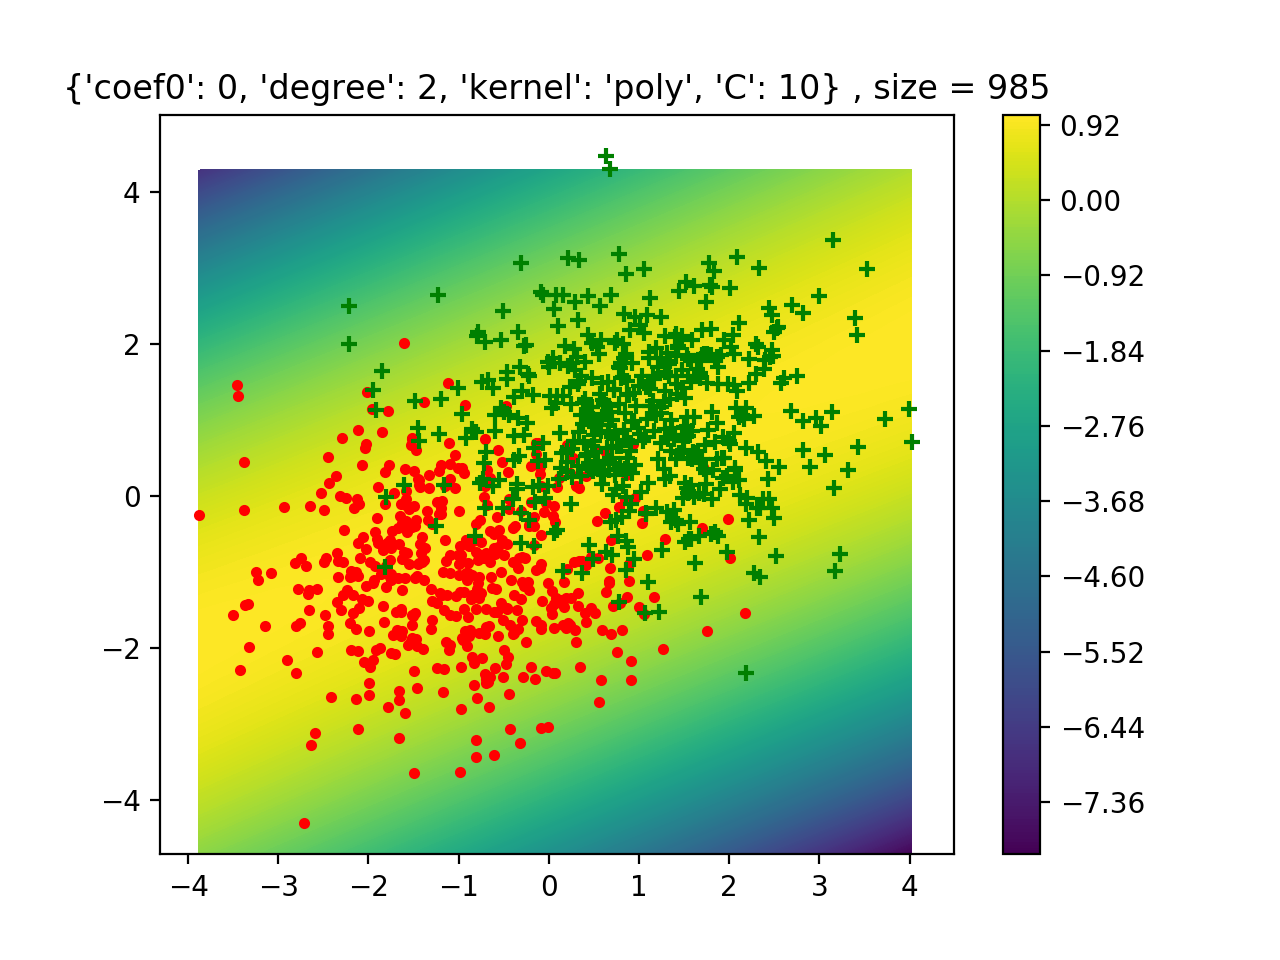

In [75]:
#mean: 0.47953, std: 0.04017, params: {'coef0': 0, 'degree': 2, 'kernel': 'poly', 'C': 10}
svmi3 = sklearn.svm.SVC(probability = False, kernel="poly", degree=2, C=10, coef0=0) #, ...)d
svmi3.fit(X,Y)

plt.figure()
title = "{'coef0': 0, 'degree': 2, 'kernel': 'poly', 'C': 10} , size = " + str(svmi3.support_.size)
plt.title(title)
plot_frontiere_proba(X, lambda x: svmi3.decision_function(x), step=50)
plt.colorbar()
plot_data(X[svmi3.support_], Y[svmi3.support_])
#plt.show()
plt.savefig('../compte_rendu/TME1_6/images/tme5/grid_arti3.png')

In [66]:
svmi3.support_

array([  3,   4,   5,   7,   8,   9,  13,  14,  17,  19,  22,  24,  31,
        32,  33,  34,  37,  39,  40,  41,  44,  47,  48,  50,  56,  57,
        58,  59,  60,  61,  64,  65,  66,  72,  73,  74,  77,  79,  80,
        83,  84,  85,  86,  90,  91,  92,  94,  96,  98,  99, 105, 106,
       107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 122, 123,
       129, 131, 132, 134, 141, 142, 147, 148, 149, 152, 153, 154, 155,
       157, 158, 160, 161, 163, 164, 165, 167, 168, 169, 171, 174, 179,
       180, 184, 187, 191, 194, 197, 199, 200, 201, 202, 206, 208, 215,
       217, 218, 219, 225, 226, 227, 228, 229, 230, 231, 233, 235, 241,
       244, 245, 252, 253, 256, 257, 258, 260, 261, 262, 264, 265, 267,
       270, 271, 272, 276, 278, 279, 280, 286, 287, 288, 290, 293, 295,
       296, 297, 299, 300, 301, 305, 307, 309, 312, 313, 315, 318, 321,
       323, 327, 328, 329, 331, 335, 337, 339, 341, 342, 343, 345, 348,
       349, 350, 351, 353, 355, 356, 357, 360, 362, 363, 364, 36